#PROTOTYPE

In [ ]:
import pandas as pd
data = pd.read_csv('/content/diabetes.csv')
# data.head(5)
diab = data.copy()
target = 'CLASS'
features_list = list(diab.columns)
features_list.remove(target)

In [ ]:
df_first_3 = data.head(100)
df_first_3

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,40,22.0,159,5.4,3.1,1.6,1.1,1.3,0.7,24.0,0
96,1,54,6.3,106,5.6,4.3,2.0,1.3,2.2,0.9,20.0,0
97,1,50,3.3,70,4.9,3.7,0.9,1.2,2.7,0.6,24.0,0
98,0,60,7.5,70,0.9,3.4,5.3,1.1,3.6,0.8,24.0,0


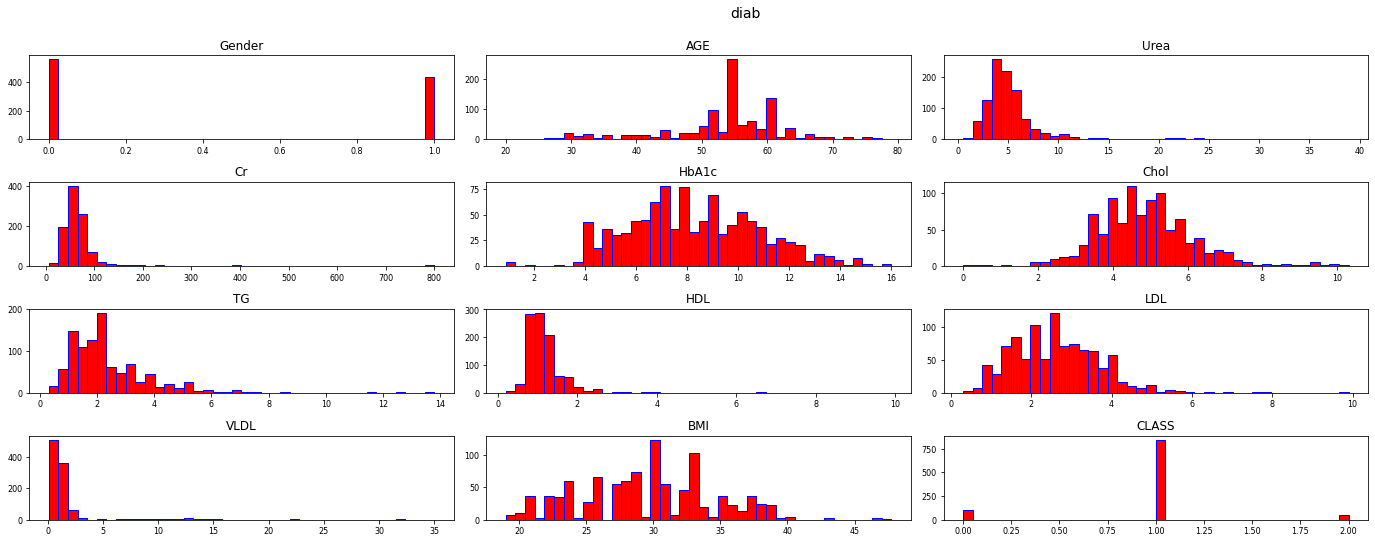

In [ ]:
diab[:].hist(bins=40, edgecolor='b', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False, 
                          figsize=(16,6), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('diab', x=0.65, y=1.25, fontsize=14);

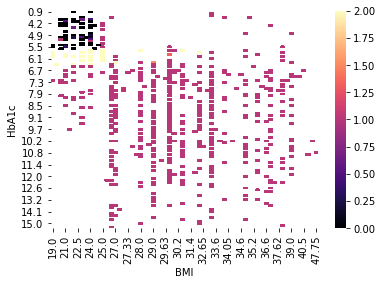

In [ ]:
# gapminder = pd.read_csv('http://bit.ly/2cLzoxH')
df1 = data[['HbA1c', 'BMI','CLASS']]
heatmap1_data = pd.pivot_table(df1, values='CLASS', index=['HbA1c'], columns='BMI')
sns.heatmap(heatmap1_data, cmap="magma")

In [ ]:
import numpy as np
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from scipy.stats import norm
import time
import keras
from keras.layers import Conv2D, Conv2DTranspose, Input, Flatten, Dense, Lambda, Reshape
from keras.layers import BatchNormalization
from keras.models import Model
from keras.datasets import mnist
from keras.losses import binary_crossentropy
from keras import backend as K

In [ ]:
data_X=diab[features_list]
data_y=diab['CLASS']

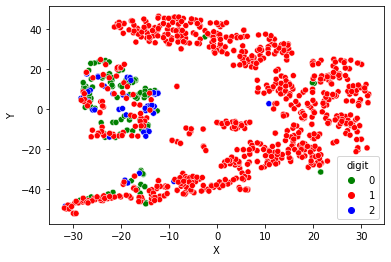

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
tsne_obj= tsne.fit_transform(data_X)
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                        'digit':data_y})

sns.scatterplot(x="X", y="Y",
              hue="digit",
              palette=['green','red','blue'],  
              legend='brief',
              data=tsne_df);

In [ ]:
x = data.iloc[:, [0,1,2,3,4,5,6,7,8,9,10]].values
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [ ]:
x

array([[ 1. , 50. ,  4.7, ...,  1.4,  0.5, 24. ],
       [ 0. , 26. ,  4.5, ...,  2.1,  0.6, 23. ],
       [ 1. , 50. ,  4.7, ...,  1.4,  0.5, 24. ],
       ...,
       [ 0. , 30. ,  7.1, ...,  2.4,  8.1, 27.4],
       [ 0. , 38. ,  5.8, ...,  2.9, 14. , 40.5],
       [ 0. , 54. ,  5. , ...,  3. ,  0.7, 33. ]])

In [ ]:
ans=0
# int(data.iloc[:, [11]].values[0]),y_kmeans[0]
for i in range(len(x)):
  if int(data.iloc[:, [11]].values[i])==y_kmeans[i]:
    ans+=1
ans/len(x)

0.031

In [ ]:
x,y_kmeans

(array([[ 1. , 50. ,  4.7, ...,  1.4,  0.5, 24. ],
        [ 0. , 26. ,  4.5, ...,  2.1,  0.6, 23. ],
        [ 1. , 50. ,  4.7, ...,  1.4,  0.5, 24. ],
        ...,
        [ 0. , 30. ,  7.1, ...,  2.4,  8.1, 27.4],
        [ 0. , 38. ,  5.8, ...,  2.9, 14. , 40.5],
        [ 0. , 54. ,  5. , ...,  3. ,  0.7, 33. ]]),
 array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0,
        3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3,
        3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 3, 3, 0,
        0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3,
        0, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 0,
        0, 0, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 0, 0,
        0, 0,

In [ ]:
x[0,0]

1.0

In [ ]:
x[y_kmeans == 0, 0]

array([1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0.

In [ ]:
x[y_kmeans == 0, 1]

array([50., 26., 50., 50., 33., 45., 50., 48., 43., 32., 31., 33., 30.,
       45., 50., 50., 50., 30., 49., 49., 42., 33., 50., 39., 30., 30.,
       41., 33., 44., 48., 47., 36., 42., 47., 39., 38., 46., 44., 41.,
       45., 44., 33., 43., 33., 49., 31., 49., 44., 47., 44., 45., 43.,
       47., 50., 50., 49., 50., 49., 44., 48., 47., 47., 44., 35., 40.,
       35., 42., 59., 31., 40., 41., 41., 43., 44., 59., 35., 51., 30.,
       50., 57., 50., 35., 63., 36., 50., 25., 40., 40., 50., 30., 60.,
       77., 44., 40., 54., 50., 60., 77., 59., 57., 38., 34., 34., 34.,
       31., 31., 43., 42., 47., 50., 49., 50., 49., 49., 50., 49., 42.,
       50., 49., 39., 50., 39., 49., 39., 50., 33., 50., 30., 33., 30.,
       50., 33., 50., 50., 49., 33., 50., 50., 49., 50., 50., 50., 50.,
       55., 40., 40., 35., 41., 43., 54., 30., 39., 48., 31., 30., 45.,
       45., 45., 31., 45., 30., 30., 35., 35., 45., 45., 45., 50., 50.,
       48., 38., 46., 45., 54., 54., 43., 49., 49., 45., 47., 38

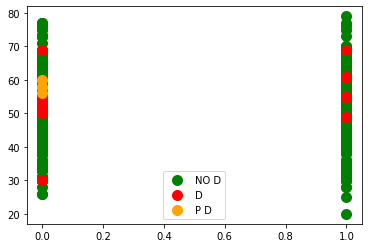

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'green', label = 'NO D')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'red', label = 'D')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'orange', label = 'P D')

#Plotting the centroids of the clusters
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'blue', label = 'Centroids')

plt.legend()